#t-SNE Tensor Visualization Tutorial

## **Getting Started:**
1. Use Google Chrome

2. Click **'Open in Playground'** to create your own workable instance of the notebook.

3. Run first two chunks using the [*Play Button*] on the top left corner of each chunk
    1. The first chunk imports a number of packages for data manipulation and visualization
    2.  The function *configure_plotly_browser_state()* allows plotly to show in the notebook
    
4. Enable 3rd party cookies (also necessary for plotly to show in the notebook). Don't worry, you can block them again afterwards.
    1. settings
    2. search "cookies"
    3. content settings
    4. cookies
    5. Uncheck "Block third-party cookies"

5. Click [+] CODE (above) to add a new chunk of code after  *configure_plotly_browser_state()*

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

# lets numpy print longer lines for displaying matrices
np.set_printoptions(linewidth=1000)

In [4]:
# setup plotly function to work in colab (make sure to enable 3rd party cookies)
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
init_notebook_mode(connected=False)

In [5]:
data = pd.read_csv("https://pjreddie.com/media/files/mnist_train.csv", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
col_names = []
col_names = ['pixel_'+str(col) for col in data.columns]
col_names[0] = 'value'

print(col_names[:10])

data.columns = col_names
data.head()

['value', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5', 'pixel_6', 'pixel_7', 'pixel_8', 'pixel_9']


,value,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
df = data.sample(n=5000).reset_index(drop=True)

pixels = df.drop('value', axis=1).values

In [8]:
first_val = pixels[0].reshape((28,28))
print(first_val)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   8 206 231  77   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  43 254 254 122   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 196 254 254  84   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 217 254 235  20   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  53 251 254 136   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 176 254 254  53   0   0   0   

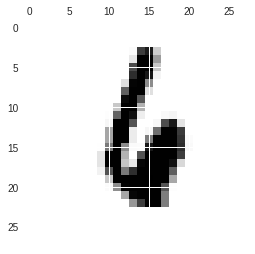

In [9]:
plt.matshow(first_val)

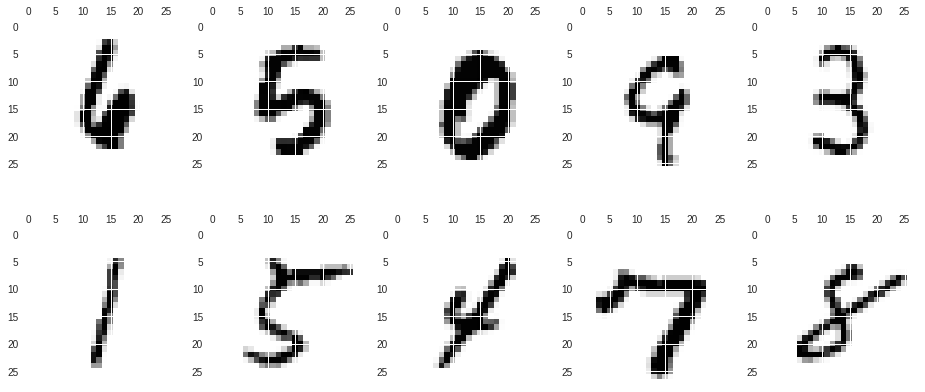

In [10]:
# plot more entries
fig = plt.figure(figsize=(16,7))
for i in range(10):
    subplot = fig.add_subplot(2,5,i+1) # specifies 2X5 subplot with position i+1
    subplot.matshow(pixels[i].reshape((28,28)))

In [11]:
pixels[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   8, 206, 231,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 254, 254, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 196, 254, 254,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 217, 254, 235,  20,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
   

In [0]:
#t-SNE

In [12]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=700)  #n_components = 2d space; verbose: progress bar(1); perplexity and n_iter are decided based on tests/experiences 
tsne_results = tsne.fit_transform(pixels)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.581s...
[t-SNE] Computed neighbors for 5000 samples in 46.751s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 468.704464
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.433800
[t-SNE] Error after 700 iterations: 1.532441


In [0]:
df['x-tsne'] = tsne_results[:,0]
df['y-tsne'] = tsne_results[:,1]

In [0]:
colors = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd']
color_map = map(lambda x: colors[x], df['value'])
df['color'] = list(color_map)

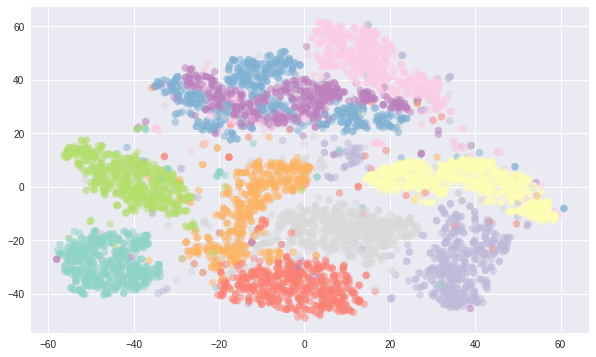

In [15]:
fig = plt.subplots(figsize=(10,6))
plt.scatter(x=df['x-tsne'], y=df['y-tsne'], c=df['color'], alpha=0.5)

In [0]:
#3-D t-SNE


In [19]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=700)
tsne_results_3d = tsne.fit_transform(pixels)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.498s...
[t-SNE] Computed neighbors for 5000 samples in 36.209s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 468.704464
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.600433
[t-SNE] Error after 700 iterations: 1.305643


In [0]:
df['x-tsne'] = tsne_results_3d[:,0]
df['y-tsne'] = tsne_results_3d[:,1]
df['z-tsne'] = tsne_results_3d[:,2]

In [21]:
# plot in plotly
configure_plotly_browser_state()

scatter = [go.Scatter3d(
    x=df['x-tsne'],
    y=df['y-tsne'],
    z=df['z-tsne'],
    mode='text',
    text=df['value'],
    textfont=dict(
        color=df['color']
    )
)]

fig = go.Figure(data=scatter)

iplot(fig)